# Digital Image Processing - Assignment 0

Author: Soham Vaishnav (soham.vaishnav@research.iiit.ac.in)\
Roll No.: 2022112002

## Importing required libraries

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2

IMAGE_DIR = "./media/" # Image directory

## Misc. functions

In [10]:
def GenerateHistogram(src, is_gray: bool) -> None: #uses Numpy and Matplotlib
    ''' 
    Generates luminance histogram for grayscale as well as color images. \
    Note that for color images, the input should be in BGR format.

    Arguments:
    src = the image for which histogram needs to be generated.
    '''
    
    if (not is_gray):
        uniqs, bins = np.unique(src[:,:,0], return_counts = True)
        plt.bar(uniqs, bins, color = "red")
        plt.xlim((0, 255))

        uniqs, bins = np.unique(src[:,:,1], return_counts = True)
        plt.bar(uniqs, bins, color = "green")
        plt.xlim((0, 255))

        uniqs, bins = np.unique(src[:,:,2], return_counts = True)
        plt.bar(uniqs, bins, color = "blue")
        plt.xlim((0, 255))

        return None

    else:
        uniqs, bins = np.unique(src, return_counts = True)
        plt.bar(uniqs, bins, color = 'gray')
        plt.xlim((0, 255))
        
    return uniqs, bins

def Convert(src, is_BGR: bool, to_RGB: bool, is_RGB: bool, to_BGR: bool):
    ''' 
    Converts the default (known via inputs) BGR image to RGB image for ease in plotting using Matplotlib

    Arguments:
    src = input image 
    is_BGR = boolean to denote the current state of the image
    is_RGB = boolean to denote whether the conversion is required or not
    '''

    if ((is_BGR and to_RGB) or (is_RGB and to_BGR)):
        temp = src.copy()
        src[:,:,0] = temp[:,:,2]
        src[:,:,2] = temp[:,:,0]
        return src
    else:
        return src

## Task 1

Read an image (bell.jpeg) file into an array.\
I have used OpenCV libary for this task.

In [3]:
def ImageRead(Image_Dir: str, file_name: str): 
    '''
    Read an image into an array and return the array as well a boolean value to denote if it is 
    a colored image (RGB) or not.

    Arguments:
    Image_Dir = path to directory containing the images.
    file_name = name of the image file.
    '''
    assert os.path.exists(Image_Dir), f"{Image_Dir} does not exist!" #checking for input path validity
    image_path = os.path.join(Image_Dir, file_name)

    assert os.path.exists(image_path), f"{image_path} does not exist!" #checking for image path validity
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if (len(image.shape) == 3 and image.shape[2] == 3):
        image = Convert(image, is_BGR = True, to_RGB = True, is_RGB = False, to_BGR = False)
        print("Image '" + file_name + "' is read into an array and is stored in RGB format"
              " - 3 channels detected.")
        return image, True
    print("Image '" + file_name + "' is read into an array and is stored in Grayscale format"
          " - only 1 channel detected.")
    return image, False

filename = 'people.jpg'
image, isColor = ImageRead(Image_Dir = IMAGE_DIR, file_name = filename)
print("Image type: ", type(image))
print("The image array:\n", image)
print("HxWxC: ", image.shape)
print("data-type: ", image.dtype)

Image 'people.jpg' is read into an array and is stored in RGB format - 3 channels detected.
Image type:  <class 'numpy.ndarray'>
The image array:
 [[[123 142  97]
  [125 144  99]
  [126 145 100]
  ...
  [ 58  80  31]
  [ 45  67  20]
  [ 54  76  29]]

 [[122 141  96]
  [125 144  99]
  [126 145 100]
  ...
  [ 60  82  35]
  [ 57  79  33]
  [ 66  88  42]]

 [[121 140  94]
  [124 143  97]
  [125 144  98]
  ...
  [ 71  89  49]
  [ 75  93  53]
  [ 78  96  56]]

 ...

 [[ 20  18  19]
  [ 29  27  28]
  [ 48  46  49]
  ...
  [140 147 157]
  [139 146 156]
  [139 146 156]]

 [[ 19  17  18]
  [ 28  26  27]
  [ 48  46  49]
  ...
  [139 146 156]
  [139 146 156]
  [138 145 155]]

 [[ 18  16  17]
  [ 27  25  26]
  [ 47  45  48]
  ...
  [139 146 156]
  [138 145 155]
  [138 145 155]]]
HxWxC:  (1080, 1440, 3)
data-type:  uint8


## Task 2

Write an array into image-file while being mindful of Grayscale and RGB characteristics of the image.\
I have used OpenCV to do this task. 

In [4]:
def ImageWrite(src, Target_Dir: str, image_file_name: str, is_rgb: bool) -> None:
    '''
    Write an array into image-file and return the filepath.\\
    Note: Put is_rgb as False only if the image is Grayscale.

    Arguments:
    src = input image array
    Target_Dir = Path to the target directory
    image_file_name = name of the file the image needs to be written into
    is_rgb = a boolean value denoting whether the image is rgb or not; 
            if not, image will be considered grayscale
    ''' 

    assert os.path.exists(Target_Dir), f"{Target_Dir} is invalid!"
    image_path = os.path.join(Target_Dir, image_file_name)

    if (is_rgb):
        src = Convert(src, is_BGR = False, to_RGB = False, is_RGB = True, to_BGR = True)
    cv2.imwrite(image_path, src)
    return image_path

filename = 'people.jpg'
target_filename = 'people_write.jpg'
image, isColor = ImageRead(IMAGE_DIR, filename)
ImageWrite(image, IMAGE_DIR, target_filename, isColor)


Image 'people.jpg' is read into an array and is stored in RGB format - 3 channels detected.


'./media/people_write.jpg'

## Task 3

Change brightness of the image.\
I have used Numpy for this task and Matplotlib for displaying the results.

Image 'people.jpg' is read into an array and is stored in RGB format - 3 channels detected.
Image has been processed.
Image has been processed.
Image has been processed.
Image has been processed.
Image has been processed.


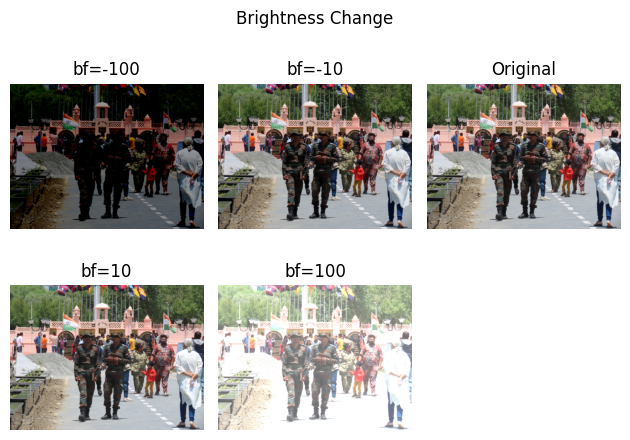

Image has been processed.
Image has been processed.
Image has been processed.
Image has been processed.
Image has been processed.


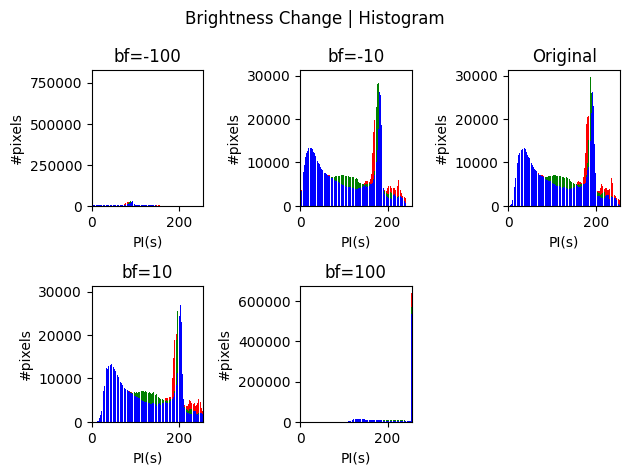

In [11]:
def Brighten(src, b_factor: float, isColor: bool):
    ''' 
    Brightens the image by modifying its pixel intensities.

    Arguments:
    src = input image array in HWC format.
    b_factor = the value by which the brightness needs to be increased.
    isColor = boolean value for denoting the type of the image.
    '''
    
    if (isColor):
        intensity_increaser = b_factor*np.ones((src.shape[0], src.shape[1], src.shape[2]))
    else:
        intensity_increaser = b_factor*np.ones((src.shape[0], src.shape[1]))
        
    image = (src + intensity_increaser).clip(0, 255).astype(np.uint8)
    print("Image has been processed.")

    return image

filename = 'people.jpg'
image, isColor = ImageRead(IMAGE_DIR, filename)

#plotting
bf = [-100, -10, 0, 10, 100]
plt.suptitle("Brightness Change")
for i in range(5):
    image_bright = Brighten(image, bf[i], isColor) 

    if (bf[i] == 0):
        plt.subplot(2, 3, i+1)
        plt.imshow(image_bright)
        plt.axis('off')
        plt.title("Original")
        continue

    plt.subplot(2, 3, i+1)
    plt.imshow(image_bright)
    plt.axis('off')
    plt.title("bf=%i"%bf[i])
plt.tight_layout()
plt.show()
plt.savefig('BF.png')


plt.suptitle("Brightness Change | Histogram")
for i in range(5):
    image_bright = Brighten(image, bf[i], isColor) 

    if (bf[i] == 0):
        plt.subplot(2, 3, i+1)
        GenerateHistogram(image_bright, False)
        plt.xlabel("PI(s)")
        plt.ylabel("#pixels")
        plt.title("Original")
        continue

    plt.subplot(2, 3, i+1)
    GenerateHistogram(image_bright, False)
    plt.xlabel("PI(s)")
    plt.ylabel("#pixels")
    plt.title("bf=%i"%bf[i])

plt.tight_layout()
plt.savefig('BF_Hist.png')

## Task 4

Change contrast of the image.\
Using Numpy to do the task and Matplotlib to display.

Technique: Referred to the textbook "Digital Image Processing" (4th Ed.) for understanding the concept of contrast stretching.

Image 'people_lowcont.jpg' is read into an array and is stored in RGB format - 3 channels detected.


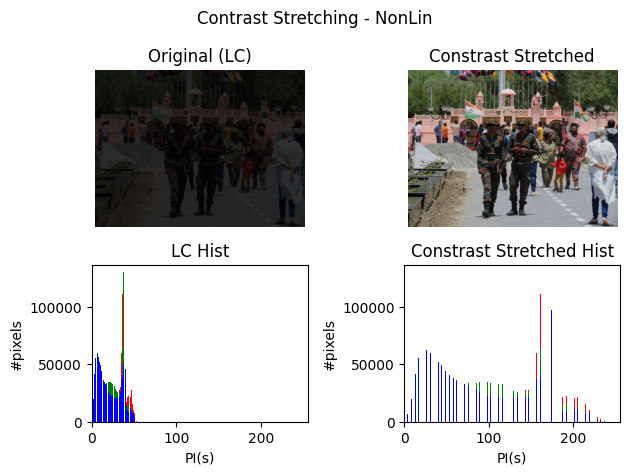

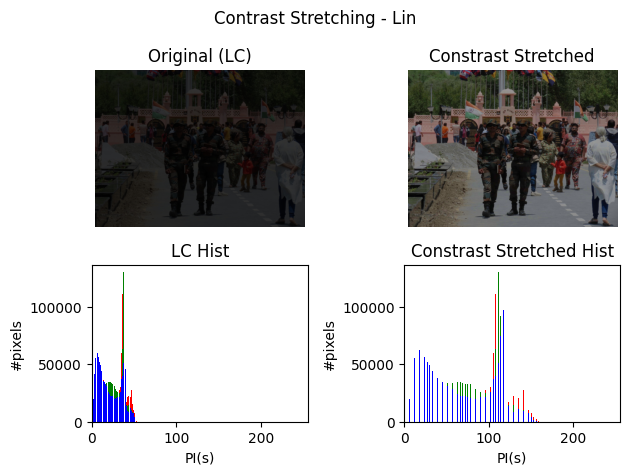

In [22]:
def Contrast_NL(src, is_color: bool, increase: bool):
    ''' 
    Apply constrast in an image using non-linear stretching/compressing the intensity range to [0, 255].\n

    Arguments:
    src = input low contrast image
    is_color = boolean value to denote the type of image being passed as input.
    increase = boolean value which denotes if the contrast needs to be increased or decreased.
    '''

    if (increase):
        p1 = [np.min(src), 0]
        p2 = [np.max(src), 255]
        
    else:
        p1 = np.random.randint(70, 100)
        p2 = np.random.randint(150, 200)

        p1 = [np.min(src), p1]
        p2 = [np.max(src), p2]

    image = p1[1] + (p2[1] - p1[1])*(src - p1[0]*np.ones((src.shape[0], src.shape[1], src.shape[2])))/(p2[0] - p1[0])
    image = image.clip(0, 255).astype(np.uint8)

    return image

def Contrast_L(src, is_color: bool, alpha: float):
    ''' 
    Apply constrast in an image using linear stretching/compressing the intensity range to [0, 255].\n

    Arguments:
    src = input low contrast image
    is_color = boolean value to denote the type of image being passed as input.
    increase = boolean value which denotes if the contrast needs to be increased or decreased.
    '''

    image = alpha*src
    image = image.clip(0, 255).astype(np.uint8)

    return image

image, isColor = ImageRead(IMAGE_DIR, 'people_lowcont.jpg')

#plotting
plt.suptitle("Contrast Stretching - NonLin")
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original (LC)")
image_NL = Contrast_NL(image, isColor, True)
plt.subplot(2, 2, 2)
plt.imshow(image_NL)
plt.axis('off')
plt.title("Constrast Stretched")
plt.subplot(2, 2, 3)
GenerateHistogram(image, not isColor)
plt.xlabel("PI(s)")
plt.ylabel("#pixels")
plt.title("LC Hist")
plt.subplot(2, 2, 4)
GenerateHistogram(image_NL, not isColor)
plt.xlabel("PI(s)")
plt.ylabel("#pixels")
plt.title("Constrast Stretched Hist")
plt.tight_layout()
plt.savefig('CStretch_NL.png')
plt.show()

plt.suptitle("Contrast Stretching - Lin")
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original (LC)")
image_L = Contrast_L(image, isColor, 3)
plt.subplot(2, 2, 2)
plt.imshow(image_L)
plt.axis('off')
plt.title("Constrast Stretched")
plt.subplot(2, 2, 3)
GenerateHistogram(image, not isColor)
plt.xlabel("PI(s)")
plt.ylabel("#pixels")
plt.title("LC Hist")
plt.subplot(2, 2, 4)
GenerateHistogram(image_L, not isColor)
plt.xlabel("PI(s)")
plt.ylabel("#pixels")
plt.title("Constrast Stretched Hist")
plt.tight_layout()
plt.savefig('CStretch_L.png')
plt.show()

## Task 5

Change color image to grayscale.\
Different techniques used:
1. Luminance based method (ref.: wikipedia)
2. Average method
3. Max pixel value of all three channels
4. Min pixel value of all three channels
5. Desaturation method ([max + min]/2)
6. User input weights

I have again used Numpy and Matplotlib to carry out the given task.

Image 'people.jpg' is read into an array and is stored in RGB format - 3 channels detected.


C:\Users\Admin\AppData\Local\Temp\ipykernel_12556\3506733717.py:31: RuntimeWarning: overflow encountered in scalar add
  image[i, j] = ((np.min((src[i,j,0], src[i,j,1], src[i,j,2]))


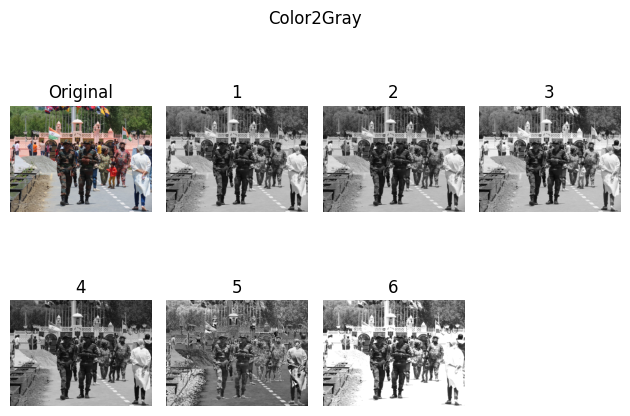

In [12]:
def Color2Gray(src, method: int):
    ''' 
    Converts a color image to grayscale image. 

    Arguments:
    src = input color image.
    method = an integer value to denote which technique needs to be used to perform the conversion 
            (refer to the markdown under Task 5).
    '''

    image = np.zeros((src.shape[0], src.shape[1]))
    if (method == 1):
        image = (0.2126*src[:,:,0] + 0.7152*src[:,:,1] + 0.0722*src[:,:,2]).clip(0, 255).astype(np.uint8)
        return image
    elif (method == 2):
        image = ((src[:,:,0]/3 + src[:,:,1]/3 + src[:,:,2]/3)).clip(0, 255).astype(np.uint8)
        return image
    elif (method == 3):
        for i in range(src.shape[0]):
            for j in range(src.shape[1]):
                image[i, j] = np.max((src[i,j,0], src[i,j,1], src[i,j,2])).clip(0, 255).astype(np.uint8)
        return image
    elif (method == 4):
        for i in range(src.shape[0]):
            for j in range(src.shape[1]):
                image[i, j] = np.min((src[i,j,0], src[i,j,1], src[i,j,2])).clip(0, 255).astype(np.uint8)
        return image
    elif (method == 5):
        for i in range(src.shape[0]):
            for j in range(src.shape[1]):
                image[i, j] = ((np.min((src[i,j,0], src[i,j,1], src[i,j,2])) 
                               + np.min((src[i,j,0], src[i,j,1], src[i,j,2])))/2).clip(0, 255).astype(np.uint8)
        return image
    elif (method == 6):
        alpha = float(input("Weight for Red channel: "))
        beta = float(input("Weight for Green channel: "))  
        gamma = float(input("Weight for Blue channel: "))  
        image = (alpha*src[:,:,0] + beta*src[:,:,1] + gamma*src[:,:,2]).clip(0, 255).astype(np.uint8)
        return image

filename = 'people.jpg'
image, isColor = ImageRead(Image_Dir = IMAGE_DIR, file_name = filename)
plt.suptitle("Color2Gray")
plt.subplot(2, 4, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original")
for i in range(1, 7):
    gray = Color2Gray(image, i)
    ImageWrite(gray, IMAGE_DIR, 'people_gray_%i.jpg'%i, False)
    plt.subplot(2, 4, i+1)
    plt.imshow(gray, cmap = 'gray')
    plt.axis('off')
    plt.title("%i"%i)
plt.tight_layout()
plt.savefig('C2G.png')
plt.show()

Plots for Histograms to see the changes in those when converting to grayscale.

Image 'people_gray_1.jpg' is read into an array and is stored in Grayscale format - only 1 channel detected.
Image 'people_gray_2.jpg' is read into an array and is stored in Grayscale format - only 1 channel detected.
Image 'people_gray_3.jpg' is read into an array and is stored in Grayscale format - only 1 channel detected.
Image 'people_gray_4.jpg' is read into an array and is stored in Grayscale format - only 1 channel detected.
Image 'people_gray_5.jpg' is read into an array and is stored in Grayscale format - only 1 channel detected.
Image 'people_gray_6.jpg' is read into an array and is stored in Grayscale format - only 1 channel detected.


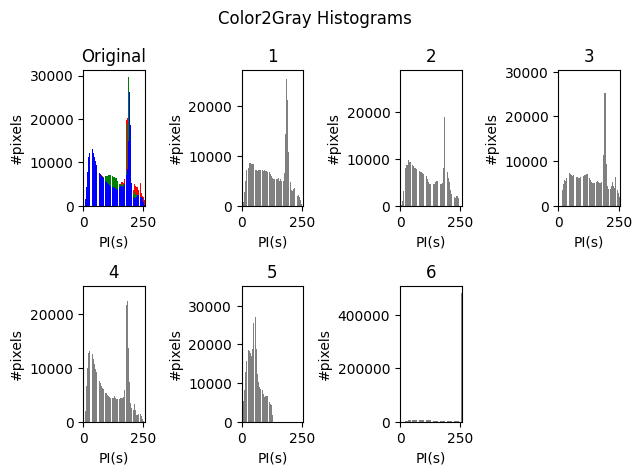

In [13]:
plt.suptitle("Color2Gray Histograms")
plt.subplot(2, 4, 1)
GenerateHistogram(image, not isColor)
plt.xlabel("PI(s)")
plt.ylabel("#pixels")
plt.title("Original")
for i in range(1, 7):
    gray, isColor = ImageRead(IMAGE_DIR, 'people_gray_%i.jpg'%i)
    plt.subplot(2, 4, i+1)
    GenerateHistogram(gray, not isColor)
    plt.xlabel("PI(s)")
    plt.ylabel("#pixels")
    plt.title("%i"%i)
plt.tight_layout()
plt.savefig('C2G_Hist.png')
plt.show()

## Task 6

Convert grayscale image to color image using pseudo color mapping.\
I have used Numpy and Matplotlib for this task.

In [72]:
gradients = []

In [109]:
def GenerateColorMap(height):
    ''' 
    Creates and visualise a mapping between grayscale and coloured images (RGB).

    Arguments:
    None.
    '''
    colorGrad = np.zeros((height, 256, 3)) #color gradient in RGB for visualisation

    for i in range(85):
        colorGrad[:,i:i+1:,1] = 255*(i/85)*np.ones((colorGrad.shape[0], 1))
        colorGrad[:,i:i+1:,2] = 255*(1-i/85)*np.ones((colorGrad.shape[0], 1))
    for i in range(85):
        colorGrad[:,85+i:85+i+1:,0] = 255*(i/85)*np.ones((colorGrad.shape[0],1))
        colorGrad[:,85+i:85+i+1:,1] = 255*(1-i/85)*np.ones((colorGrad.shape[0],1))
    for i in range(86):
        colorGrad[:,170+i:170+i+1:,0] = 255*(1-i/86)*np.ones((colorGrad.shape[0], 1))

    colorGrad = colorGrad.clip(0, 255).astype(np.uint8)
    return colorGrad

def Gray2Color(src, colorGrad):
    ''' 
    Converts a grayscale image to color image using a custom colormap.

    Arguments:
    src = input grayscale image.
    colorGrad = array used for grayscale to color mapping (RGB).
    '''
    image = np.zeros((src.shape[0], src.shape[1], 3))
    colorGrad = colorGrad[0:1,:,:] #selecting only 1 row from the color gradient for use.
    for i in range(src.shape[1]):
        image[:,i,:] = colorGrad[:,src[:,i],:]
    image = image.clip(0, 255).astype(np.uint8)
    return image

image, isColor = ImageRead(IMAGE_DIR, 'people_gray_1.jpg')
colorGrad = GenerateColorMap(20)
image_color = Gray2Color(image, colorGrad)

Image 'people_gray_1.jpg' is read into an array and is stored in Grayscale format - only 1 channel detected.


Storing various gradients.

In [90]:
gradients.append(colorGrad)
print(len(gradients))

6


Converting the list into an np array just for easier access and visualisation.

In [92]:
gradients = np.array(gradients)
print(gradients.shape)

(6, 20, 256, 3)


Plotting gradients and images

C:\Users\Admin\AppData\Local\Temp\ipykernel_16952\1574011547.py:16: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


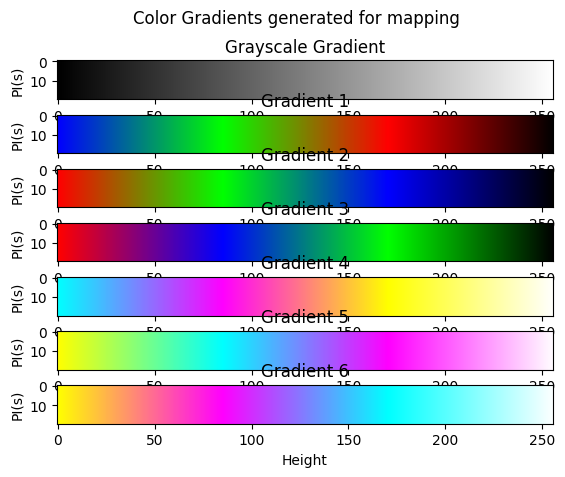

Image 'people.jpg' is read into an array and is stored in RGB format - 3 channels detected.


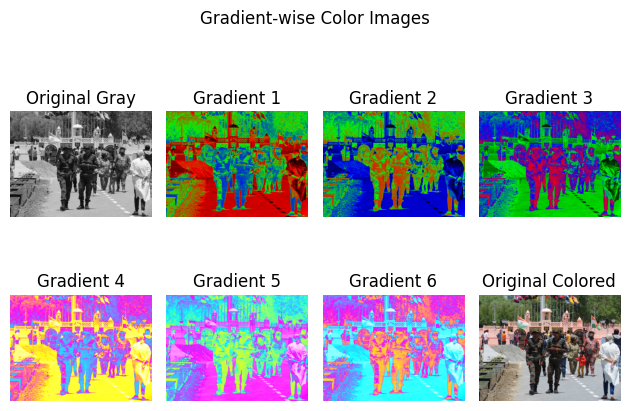

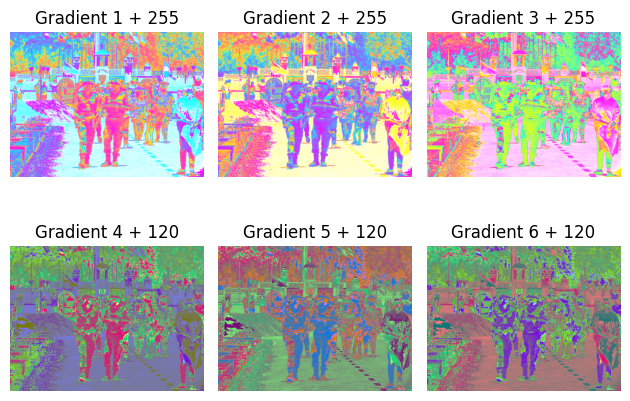

In [139]:
grayGrad = 255*np.ones((20, 256, 3))
for i in range(256):
    grayGrad[:,i:i+1:] = (i/255)*np.ones((grayGrad.shape[0], 1, 3))
plt.suptitle("Color Gradients generated for mapping")
plt.subplot(7, 1, 1)
plt.imshow(grayGrad)
plt.xlabel("Height")
plt.ylabel("PI(s)")
plt.title("Grayscale Gradient")
for i in range(1, 7):
    plt.subplot(7, 1, i+1)
    plt.imshow(gradients[i-1])
    plt.xlabel("Height")
    plt.ylabel("PI(s)")
    plt.title("Gradient %i"%i)
plt.tight_layout()
plt.savefig('Grads.png')
plt.show()

plt.suptitle("Gradient-wise Color Images")
plt.subplot(2, 4, 1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.title("Original Gray")
for i in range(1, 7):
    image_color = Gray2Color(image, gradients[i-1])
    plt.subplot(2, 4, i+1)
    plt.imshow(image_color)
    plt.axis('off')
    plt.title("Gradient %i"%i)
plt.subplot(2, 4, 8)
plt.imshow(ImageRead(IMAGE_DIR, 'people.jpg')[0])
plt.axis('off')
plt.title("Original Colored")
plt.tight_layout()
plt.savefig('G2C.png')
plt.show()

for i in range(1, 4):
    image_color = Gray2Color(image, gradients[i-1])
    plt.subplot(2, 3, i)
    plt.imshow((255 + image_color))
    plt.axis('off')
    plt.title("Gradient %i + 255"%i)
for i in range(4, 7):
    image_color = Gray2Color(image, gradients[i-1])
    plt.subplot(2, 3, i)
    plt.imshow((120 + image_color))
    plt.axis('off')
    plt.title("Gradient %i + 120"%i)
plt.tight_layout()
plt.savefig('G2C_extras.png')
plt.show()

## Task 7

Perform Chroma Keying.\
I have used Numpy and Matplotlib for the task.

Image 'fg.jpg' is read into an array and is stored in RGB format - 3 channels detected.
Image 'bg.jpg' is read into an array and is stored in Grayscale format - only 1 channel detected.


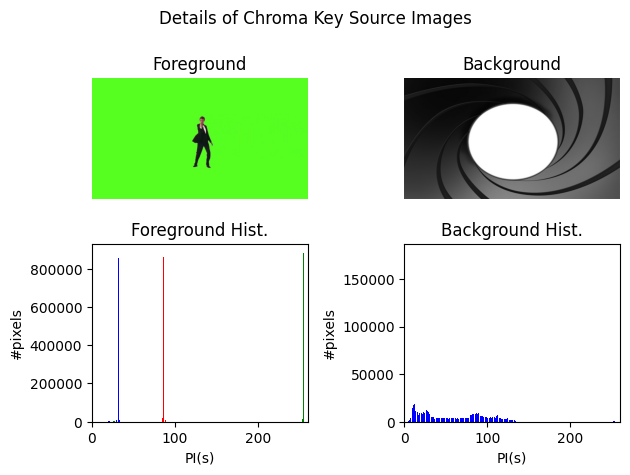

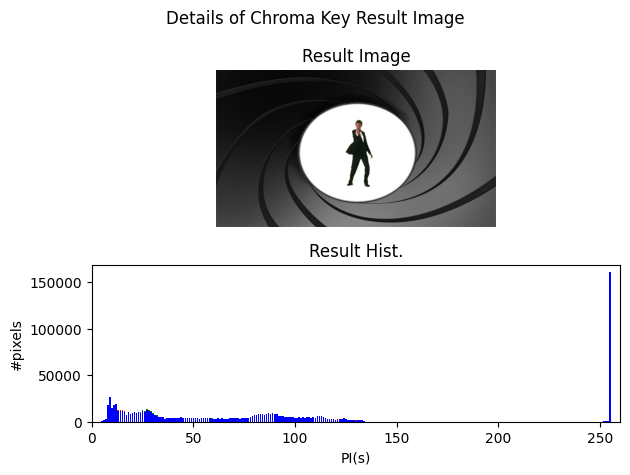

In [14]:
def ChromaKey(src_bkg, src_fgd, isColor: bool):
    ''' 
    Chroma Keying involves two images - foreground and background - wherein one contains a green screen
    which needs to be replaced with another background.

    Arguments:
    src_bkg = background image which will replace the green screen.
    src_fgd = foreground image wherein the green screen will be replaced.
    isColor = boolean to say whether both the images are to be considered colored
    '''

    if (isColor == True):
        if (len(src_bkg.shape) > len(src_fgd.shape)):
            #implies that fgd image is grayscale
            fgd = np.zeros((src_fgd.shape[0], src_fgd.shape[1], 3))
            fgd[:,:,0] = src_fgd
            fgd[:,:,1] = src_fgd
            fgd[:,:,2] = src_fgd
            src_fgd = fgd.clip(0, 255).astype(np.uint8)
        elif (len(src_bkg.shape) < len(src_fgd.shape)):
            #implies that bkg image is grayscale
            bkg = np.zeros((src_bkg.shape[0], src_bkg.shape[1], 3))
            bkg[:,:,0] = src_bkg
            bkg[:,:,1] = src_bkg
            bkg[:,:,2] = src_bkg
            src_bkg = bkg.clip(0, 255).astype(np.uint8)
    # if (src_bkg[:,:,0].all() == src_bkg[:,:,1].all() and src_bkg[:,:,1].all() == src_bkg[:,:,2].all()):
    #     print("hi")
    else:
        print("Chroma keying is not possible for grayscale images :(")
        return None, False
    
    #plotting for visualisation
    plt.suptitle("Details of Chroma Key Source Images")
    plt.subplot(2, 2, 1)
    plt.imshow(src_fgd)
    plt.axis('off')
    plt.title("Foreground")
    plt.subplot(2, 2, 2)
    plt.imshow(src_bkg)
    plt.axis('off')
    plt.title("Background")
    plt.subplot(2, 2, 3)
    GenerateHistogram(src_fgd, not isColor)
    plt.xlim((0, 260))
    plt.xlabel("PI(s)")
    plt.ylabel("#pixels")
    plt.title("Foreground Hist.")
    plt.subplot(2, 2, 4)
    GenerateHistogram(src_bkg, not isColor)
    plt.xlim((0, 260))
    plt.xlabel("PI(s)")
    plt.ylabel("#pixels")
    plt.title("Background Hist.")
    plt.tight_layout()
    plt.savefig('CK.png')
    plt.show()
    
    #images can be of different sizes as well, so resizing is necessary
    H1 = src_fgd.shape[0]
    W1 = src_fgd.shape[1]

    H2 = src_bkg.shape[0]
    W2 = src_bkg.shape[1]

    if (src_bkg.shape != src_fgd.shape): #image resizing
        H = W = 0
        if ((H1 >= H2) and (W1 >= W2)):
            H = H2
            W = W2
            src_fgd = cv2.resize(src_fgd, (W, H))
        elif (H1 <= H2 and W1 <= W2):
            H = H1
            W = W1
            src_bkg = cv2.resize(src_bkg, (W, H))
        elif (H1 >= H2 and W1 <= W2):
            H = H2
            W = W1
            src_fgd = cv2.resize(src_fgd, (W, H))
            src_bkg = cv2.resize(src_bkg, (W, H))
        elif (H1 <= H2 and W1 >= W2):
            H = H1
            W = W2
            src_fgd = cv2.resize(src_fgd, (W, H))
            src_bkg = cv2.resize(src_bkg, (W, H))
    src_bkg = src_bkg.clip(0, 255).astype(np.uint8)
    src_fgd = src_fgd.clip(0, 255).astype(np.uint8)
    
    image = src_fgd.copy()
    src_fgd = np.where(src_fgd[:,:,1] > 210, 255, src_fgd[:,:,1])
    image[src_fgd == 255] = src_bkg[src_fgd == 255]

    return image, True

src_fgd, isColor_fgd = ImageRead(IMAGE_DIR, 'fg.jpg')
src_bkg, isColor_bkg = ImageRead(IMAGE_DIR, 'bg.jpg')

isColor = True #based on user knowledge
image_ck, isDone = ChromaKey(src_bkg, src_fgd, isColor)

assert isDone, f"Exited."
plt.suptitle("Details of Chroma Key Result Image")
plt.subplot(2, 1, 1)
plt.imshow(image_ck)
plt.axis('off')
plt.title("Result Image")
plt.subplot(2, 1, 2)
GenerateHistogram(image_ck, not isColor)
plt.xlim((0, 260))
plt.xlabel("PI(s)")
plt.ylabel("#pixels")
plt.title("Result Hist.")
plt.tight_layout()
plt.savefig('CK_out.png')
plt.show()

Some extra plots...

Image 'fg.jpg' is read into an array and is stored in RGB format - 3 channels detected.
Image 'Beach.jpeg' is read into an array and is stored in RGB format - 3 channels detected.
Image 'subway_station.jpeg' is read into an array and is stored in RGB format - 3 channels detected.


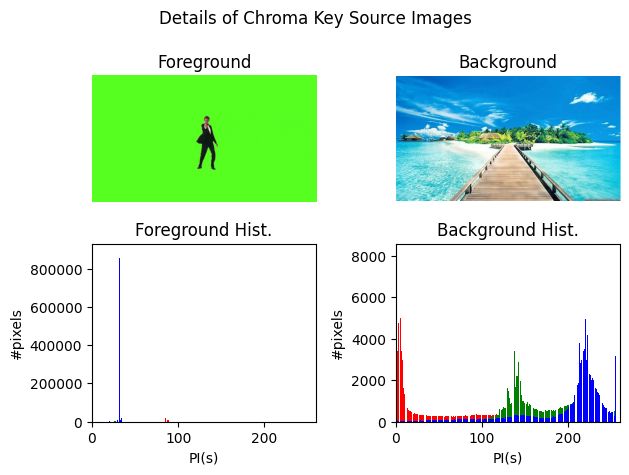

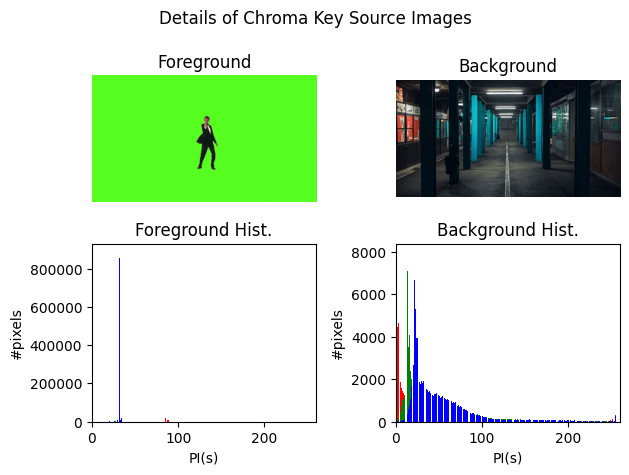

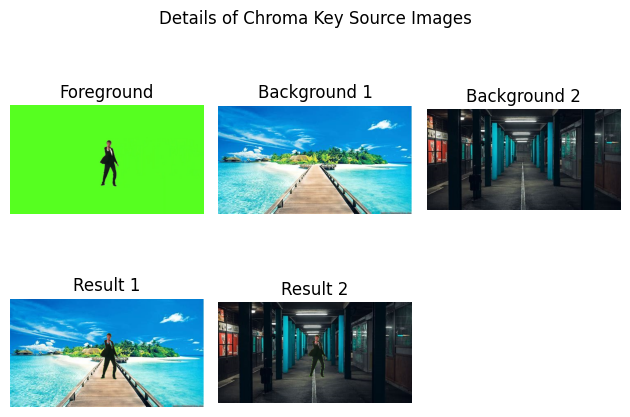

'./media/task7_out1.png'

In [15]:
fgd, isColor_fgd = ImageRead(IMAGE_DIR, 'fg.jpg')
bkg1, isColor_bkg1 = ImageRead(IMAGE_DIR, 'Beach.jpeg')
bkg2, isColor_bkg2 = ImageRead(IMAGE_DIR, 'subway_station.jpeg')

image_ck1, isDone1 = ChromaKey(bkg1, fgd, True)
image_ck2, isDone2 = ChromaKey(bkg2, fgd, True)


assert isDone1, f"Exited."
assert isDone2, f"Exited."
plt.suptitle("Details of Chroma Key Source Images")
plt.subplot(2, 3, 1)
plt.imshow(fgd)
plt.axis('off')
plt.title("Foreground")
plt.subplot(2, 3, 2)
plt.imshow(bkg1)
plt.axis('off')
plt.title("Background 1")
plt.subplot(2, 3, 3)
plt.imshow(bkg2)
plt.axis('off')
plt.title("Background 2")
plt.subplot(2, 3, 4)
plt.imshow(image_ck1)
plt.axis('off')
plt.title("Result 1")
plt.subplot(2, 3, 5)
plt.imshow(image_ck2)
plt.axis('off')
plt.title("Result 2")
plt.tight_layout()
plt.savefig('CK_Extras.png')
plt.show()

ImageWrite(image_ck1, IMAGE_DIR, 'task7_out1.png', True)


## Task 8

Read a video file and convert it into a series of images and write it back into a video.\
OpenCV has been used for the reading and writing operations. 

In [16]:
def VideoRead(srcDir: str, srcFile: str):
    ''' 
    Converts a video file into a series of images.

    Arguments:
    srcDir = source directory name (as a string).
    srcFile = source video file name (as a string).
    duration = a floating point value denoting the temporal length of the video
    '''
    video_path = os.path.join(srcDir, srcFile)
    assert os.path.exists(video_path), f"{video_path} is invalid!"

    video = cv2.VideoCapture()
    video.open(video_path)
    num_Frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS)
    duration = round(num_Frames/fps)

    frames = []
    for i in range(num_Frames):
        image = video.read()[1]
        frames.append(image)
    frames = np.array(frames)
    print("Video has been read into an array containing all the frames.")

    return frames, duration

videoFrames, duration = VideoRead(IMAGE_DIR, 'task8_in.mp4')
print("Frames (format: [#frames, H, W, C]): ", videoFrames.shape)
print("Temporal length of the video: ", duration)

Video has been read into an array containing all the frames.
Frames (format: [#frames, H, W, C]):  (499, 850, 478, 3)
Temporal length of the video:  17


In [17]:
def VideoWrite(srcFrames, codec_string, FPS: float, TargetDir: str, TargetFile: str) -> str:
    ''' 
    Converts a sequence of image frames into a video and returns the path to the video file.\\
    Codec used by default is 'mp4v'. \n
    Note that isColor = False implies that the image is grayscale.

    Arguments:
    srcFrames = source array containing the frames (concatenated).
    codec_string = a string denoting the codec being used to write to video.
    FPS = frames per second value (floating point).
    isColor = boolean value to denote whether the images are grayscale or colored (False imples grayscale).
    TargetDir = path to target directory (as a string).
    TargetFile = name of the target video file (as a string).
    '''
    
    assert os.path.exists(TargetDir), f"{TargetDir} is invalid!"
    video_path = os.path.join(TargetDir, TargetFile)

    if (codec_string == None):
        codec_string = 'mp4v'

    isColor = True
    if (srcFrames.shape[3] == 1):
        isColor = False

    codec = cv2.VideoWriter_fourcc(*codec_string)
    video_writer = cv2.VideoWriter(video_path, codec, FPS, 
                                   (srcFrames.shape[2], srcFrames.shape[1]), isColor)
    for i in range(len(srcFrames)):
        video_writer.write(srcFrames[i])
    video_writer.release()
    return video_path

FPS = 30
target_filename = 'task8_out.mp4'
VideoWrite(videoFrames, None, FPS, IMAGE_DIR, target_filename)

'./media/task8_out.mp4'

## Task 9

Create a 1 second transition video using any (fade, slide, etc.) special effect from one image to another.\
OpenCV (for image/video read and write and resizing), Numpy for transformations and Matplotlib for plotting have been used.

Image 'Beach.jpeg' is read into an array and is stored in RGB format - 3 channels detected.
Image 'task7_out1.png' is read into an array and is stored in RGB format - 3 channels detected.


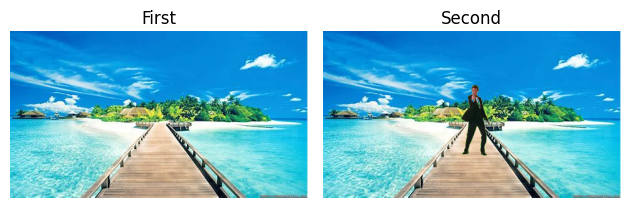

Frames (format: [#frames, H, W, C]):  (475, 266, 475, 3)


'./media/task9_slide_out.mp4'

In [248]:
def Image2Video(srcDir: str, srcIm1: str, srcIm2: str, effect: int, FPS, duration: float, TargetDir: str, TargetFile: str):
    '''
    Generates a video from 2 images (both color or both grayscale) wherein the transition occurs through some 
    special effect. \\
    For effects:\n
    1. Fade\n
    2. Slide (Here, the total number of frames will by default be taken as the width of one of the images)\n

    Note: if the image type is color, then it is assumed that it is in RGB format.
    Also, the default FPS is set to be 60 for better fluidity in the video (ref. online).\n

    Returns the path to output file.

    Arguments:
    srcDir = the path to the source directory from where the images need to be picked.
    srcIm1 = first image file name.
    srcIm2 = second image file name.
    effect = an integer value denoting what kind of transition is desired.
    FPS = floating point value for frames per second (taken 60 by default)
    duration = a floating point value denoting the temporal length of the video.
    TargetDir = the path to the target directory.
    TargetFile = the name of the resultant video name.
    '''

    img1, isColor1 = ImageRead(srcDir, srcIm1)
    img2, isColor2 = ImageRead(srcDir, srcIm2)

    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.axis('off')
    plt.title("First")
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.axis('off')
    plt.title("Second")
    plt.tight_layout()
    plt.savefig('T9_in.png')
    plt.show()

    H1 = img1.shape[0]
    W1 = img1.shape[1]

    H2 = img2.shape[0]
    W2 = img2.shape[1]


    if ((isColor1 and isColor2) or (not isColor1 and not isColor2)):
        #isColor = True implies the image is RGB and False implies that the image is grayscale
        if (img1.shape != img2.shape): #image resizing
            H = W = 0
            if ((H1 >= H2) and (W1 >= W2)):
                H = H2
                W = W2
                img1 = cv2.resize(img1, (W, H))
            elif (H1 <= H2 and W1 <= W2):
                H = H1
                W = W1
                img2 = cv2.resize(img2, (W, H))
            elif (H1 >= H2 and W1 <= W2):
                H = H2
                W = W1
                img1 = cv2.resize(img1, (W, H))
                img2 = cv2.resize(img2, (W, H))
            elif (H1 <= H2 and W1 >= W2):
                H = H1
                W = W2
                img1 = cv2.resize(img1, (W, H))
                img2 = cv2.resize(img2, (W, H))

        if (effect == 1):
            frames = []
            num_frames = int(round(FPS)*duration)
            for i in range(num_frames):
                image = (1-i/num_frames)*img1 + (i/num_frames)*img2
                image = Convert(image, is_BGR = False, to_RGB = False, is_RGB = (isColor1 and isColor2), to_BGR = (isColor1 and isColor2))
                frames.append(image.clip(0, 255).astype(np.uint8))
            frames = np.array(frames)
            print("Frames (format: [#frames, H, W, C]): ", frames.shape)
            video_path = VideoWrite(frames, None, FPS, IMAGE_DIR, TargetFile)

        elif (effect == 2):
            #sampling period for sliding the new image in and pushing the old one out will be 1
            #thus, the total number of frames will be the width of one of the images 
            num_frames = W1
            frames = []
            slider = np.zeros((H1, W1))
            image = img1.copy()
            for i in range(num_frames-1, -1, -1):
                slider[:,i:num_frames] = 255*np.ones((H1, num_frames-i))
                image[slider == 255] = img2[slider == 255]
                # image = Convert(image, is_BGR = False, to_RGB = False, is_RGB = (isColor1 and isColor2), to_BGR = (isColor1 and isColor2))
                frames.append(image.clip(0, 255).astype(np.uint8))
            frames = np.array(frames)
            plt.show()
            print("Frames (format: [#frames, H, W, C]): ", frames.shape)
            video_path = VideoWrite(frames, None, 128/duration, IMAGE_DIR, TargetFile)
            
    return video_path 

Image2Video(IMAGE_DIR, 'Beach.jpeg', 'task7_out1.png', 2, 120, 5, IMAGE_DIR, 'task9_slide_out.mp4')